# Dataset EDA

In [39]:
# Install PIP dependencies
!pip install scipy
!pip install pandas
!pip install matplotlib
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 9.7 MB/s eta 0:00:0000:01:00:01


Load the dataset from the Matlab file.

In [1]:
import scipy.io

mat_file = '../datasets/HaLT-SubjectA-160223-6St-LRHandLegTongue.mat'
mat = scipy.io.loadmat(mat_file, struct_as_record=True)
mat = {k:v for k, v in mat.items() if k[0] != '_'}

Aquire the data in the matlab file and build a pandas dataset with it.

In [2]:
import numpy as np
import pandas as pd

# Data is in the "o" variable of the matlab file
content = mat['o']

print(content['marker'][0][0].shape)
print(content['data'][0][0].shape)
headers = [header[0] for header in np.concatenate(content['chnames'][0][0]).ravel()]
print(len(headers))

df = pd.DataFrame(content['data'][0][0], columns=headers)
# Add markers column
df['Marker'] = content['marker'][0][0]

df.describe()

(667600, 1)
(667600, 22)
22


,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T3,T4,T5,T6,Fz,Cz,Pz,X5,Marker
count,667600.000000,667600.000000,667600.000000,667600.00000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,...,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000
mean,0.013370,0.009473,0.006346,0.00605,0.002721,-0.002448,-0.001642,-0.003339,-0.003775,-0.003315,...,0.017221,0.004666,0.000774,-0.001690,-0.002391,0.001947,0.001754,0.001562,-0.000057,7.747945
std,20.165716,17.601458,6.372136,6.33873,3.136998,3.147509,4.516797,4.995147,5.185552,5.378801,...,9.712346,6.142609,4.267011,5.840979,5.448110,6.656366,3.183400,4.518790,4.256118,23.615976
min,-215.370000,-191.110000,-105.560000,-82.09000,-69.190000,-82.100000,-66.330000,-83.370000,-57.110000,-199.970000,...,-220.050000,-184.060000,-101.500000,-108.600000,-100.670000,-133.500000,-45.140000,-67.360000,-219.780000,0.000000
25%,-7.670000,-7.020000,-3.390000,-3.42000,-1.830000,-1.830000,-2.720000,-2.880000,-3.120000,-2.960000,...,-4.470000,-3.410000,-2.360000,-3.130000,-3.170000,-3.520000,-1.930000,-2.620000,-0.220000,0.000000
50%,-0.890000,-0.820000,-0.240000,-0.26000,-0.000000,-0.000000,0.000000,0.020000,-0.010000,0.030000,...,-0.290000,0.030000,0.010000,0.040000,0.020000,-0.290000,-0.000000,0.020000,0.020000,0.000000
75%,4.870000,4.490000,2.880000,2.83000,1.830000,1.840000,2.710000,2.930000,3.120000,3.030000,...,3.770000,3.440000,2.360000,3.190000,3.210000,2.910000,1.920000,2.670000,0.250000,3.000000
max,477.480000,227.810000,199.770000,113.34000,125.960000,136.990000,148.300000,159.000000,70.880000,77.110000,...,349.440000,159.810000,156.420000,151.220000,143.970000,153.160000,109.650000,72.280000,527.080000,99.000000


<Axes: >

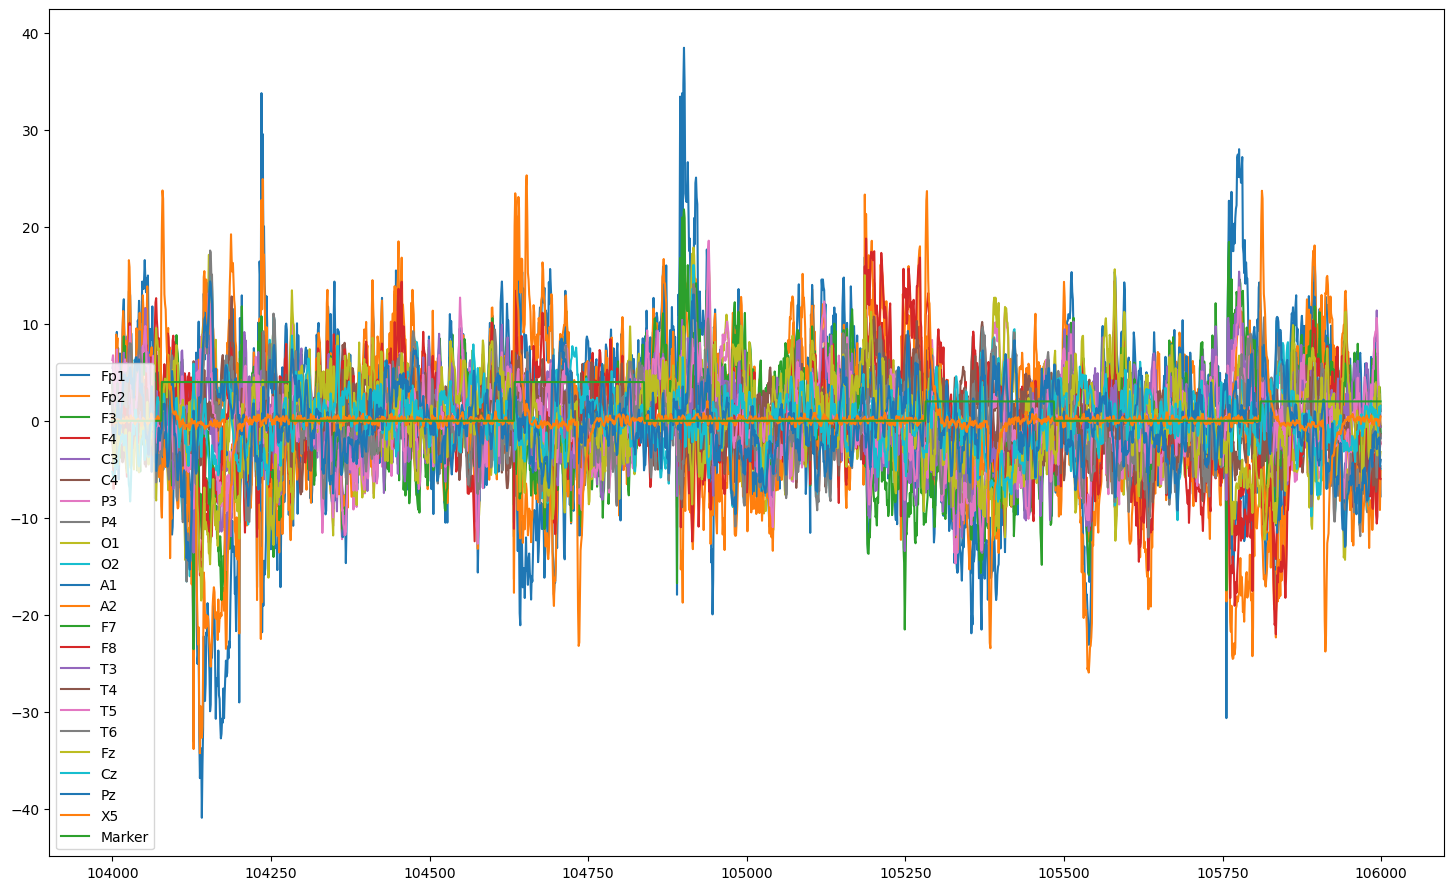

In [3]:
import matplotlib.pyplot as plt

# A small look at the data distribution
df[104000:106000].plot(kind='line', figsize=(18,11))

At the data picture avobe, some extreme values can be seen that coincides with a special value of *Marker* variable. Isolating it will clarify why the coincidence happens:

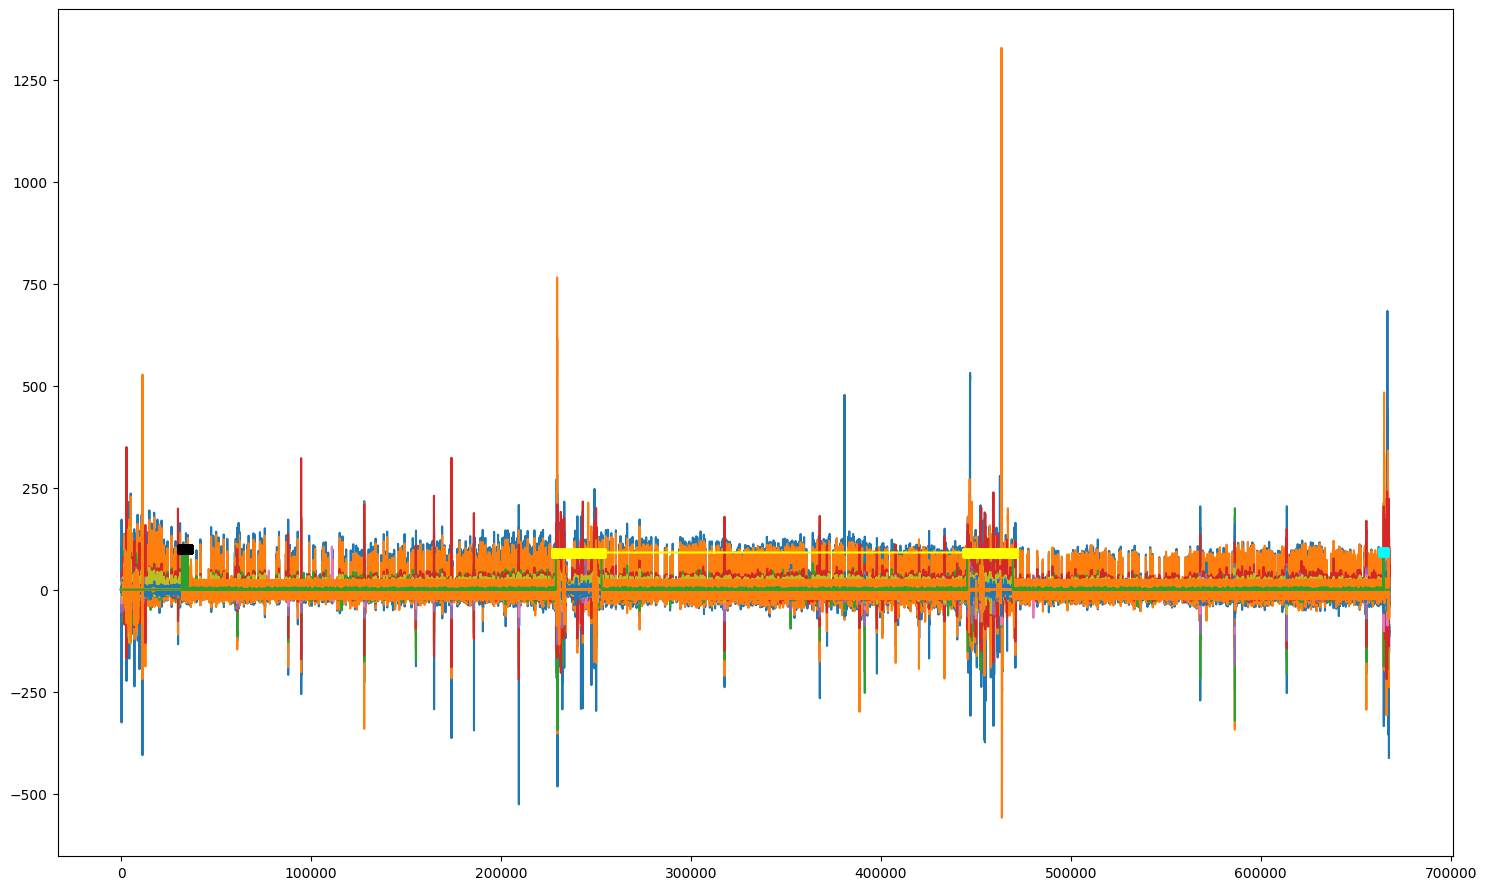

In [4]:
plt.figure(figsize=(18,11))
plt.plot(df)
plt.plot(df[['Marker']].loc[df['Marker'] == 91], marker='s', color='yellow')
plt.plot(df[['Marker']].loc[df['Marker'] == 92], marker='s', color='cyan')
plt.plot(df[['Marker']].loc[df['Marker'] == 99], marker='s', color='black')

yellow marker: to remove as they are rest state time.

black marker: initial relaxation; prior data, included marked to discard.

cyan marker: end of experiment; remove data after and included.

In [20]:
# Remove data as stated.

# Removal of data prior to experiment start.
start_idx = df.loc[df['Marker'] == 99].last_valid_index()
df = df.truncate(before=start_idx + 1)

# Removal of rest data.
rest_idx_list = df.loc[df['Marker'] == 91].index
df = df.drop(rest_idx_list)

# Remove data after experiment finished.
end_idx = df.loc[df['Marker'] == 92].first_valid_index()
df = df.truncate(after=end_idx - 1)

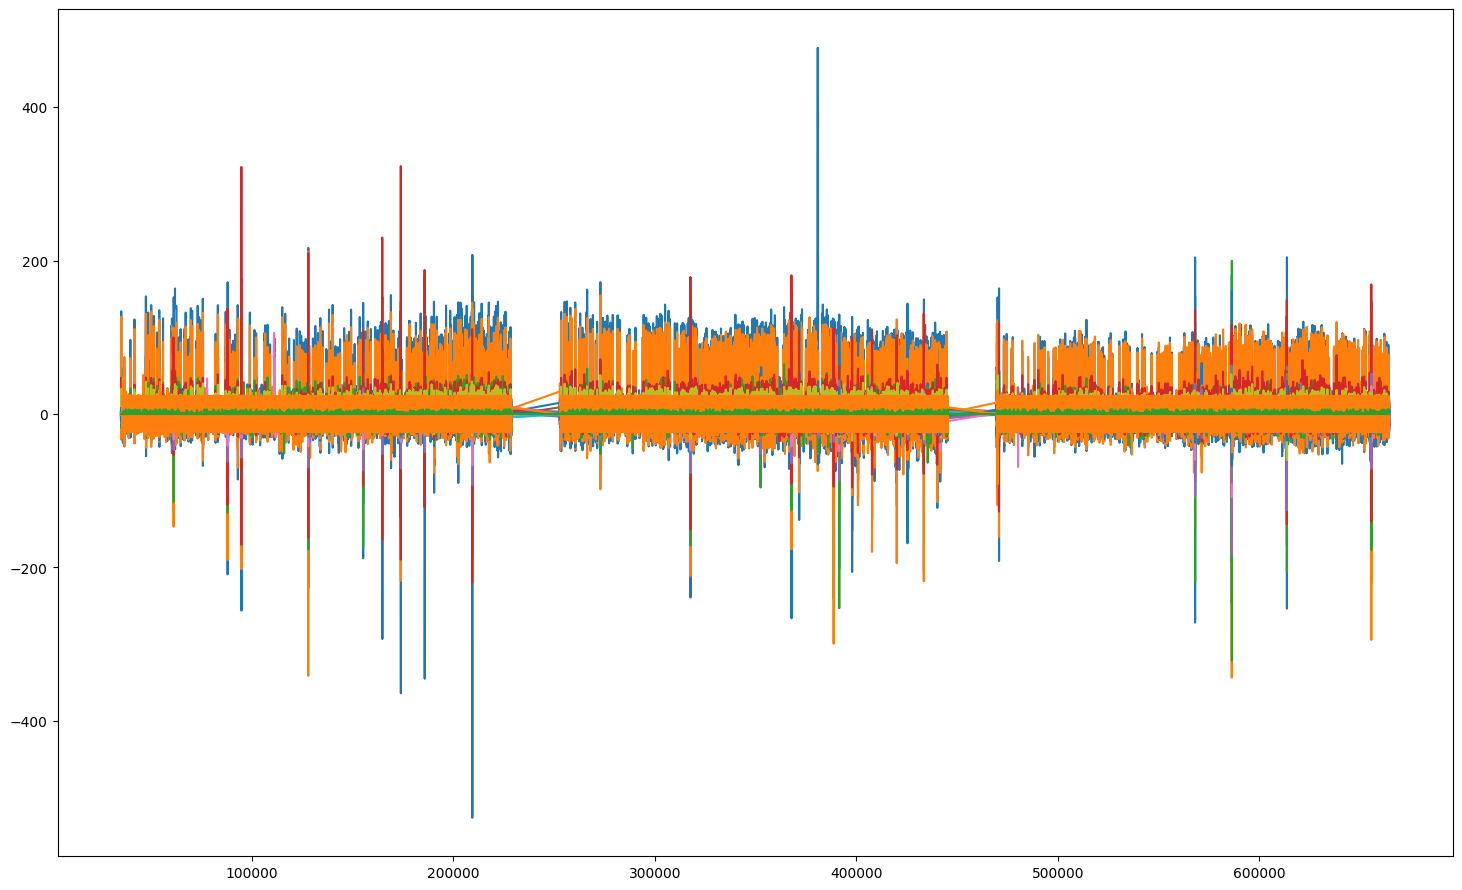

In [21]:
plt.figure(figsize=(18,11))
plt.plot(df)
plt.plot(df[['Marker']].loc[df['Marker'] == 91], marker='s', color='yellow')
plt.plot(df[['Marker']].loc[df['Marker'] == 92], marker='s', color='cyan')
plt.plot(df[['Marker']].loc[df['Marker'] == 99], marker='s', color='black')

*Marker* column contains the different classes. Below it's show what clases are in the dataset and what's their balancing related to the total.

In [48]:
def print_imbalance(df):
    class_counts = df['Marker'].value_counts().sort_index()
    total_examples = sum(class_counts)

    class_counts.name

    # Proportion of classes
    for idx in class_counts.index:
        print(f'Class {idx}: {class_counts[idx]} samples; {class_counts[idx]/total_examples *100}%')

    # Rho balancing value for the dataset:
    # From: Buda, M., Maki, A., & Mazurowski, M. A. (2018). A systematic study of the class imbalance problem in convolutional neural networks. Neural Networks, 106, 249–259. https://doi.org/10.1016/j.neunet.2018.07.011


    rho = class_counts[np.argmax(class_counts)] / class_counts[np.argmin(class_counts)] 
    print(f'\nDataset Rho value: {rho}')

print_imbalance(df)

Class 0: 386025 samples; 66.40239308358935%
Class 1: 33204 samples; 5.711612097526069%
Class 2: 32194 samples; 5.53787615551603%
Class 3: 32167 samples; 5.533231729343484%
Class 4: 31787 samples; 5.46786573135951%
Class 5: 34807 samples; 5.987353399547943%
Class 6: 31158 samples; 5.359667803117614%

Dataset Rho value: 12.389274022722896


In [49]:
# Random undersample majority class
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

y = df['Marker']
X = df.loc[:, df.columns != 'Marker']

df_rus, y_rus = rus.fit_resample(X, y)

df_rus['Marker'] = y_rus

print_imbalance(df_rus)

Class 0: 31158 samples; 14.285714285714285%
Class 1: 31158 samples; 14.285714285714285%
Class 2: 31158 samples; 14.285714285714285%
Class 3: 31158 samples; 14.285714285714285%
Class 4: 31158 samples; 14.285714285714285%
Class 5: 31158 samples; 14.285714285714285%
Class 6: 31158 samples; 14.285714285714285%

Dataset Rho value: 1.0


In [ ]:
# store in treated datasets
df_rus.to_csv('../datasets/treated/HaLT-SubjectA-160223.csv')